## HR ANALYTICS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
#from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
sns.set_style("white")

from imblearn.over_sampling import SMOTE



In [10]:
df = pd.read_csv("C:/Users\Brajesh Ranjan\Desktop\Data Science\Datasets\HR Analytics\ibm-hr-attr.csv")

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

## Exploratory Data Analysis and Visualization

In [22]:
def barplot(df, x_col, y_col):
    #Generate and Plot
    plt.figure(figsize=(5,8))
    x = df[x_col].values
    y = df[y_col].values
    sns.barplot(x,y)

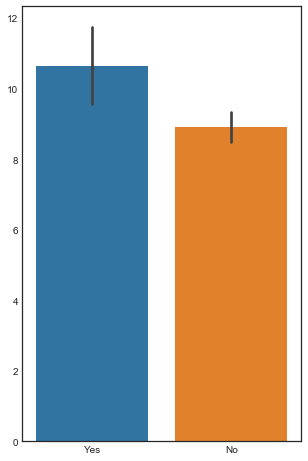

In [24]:
%matplotlib inline
barplot(df,'Attrition', 'DistanceFromHome')

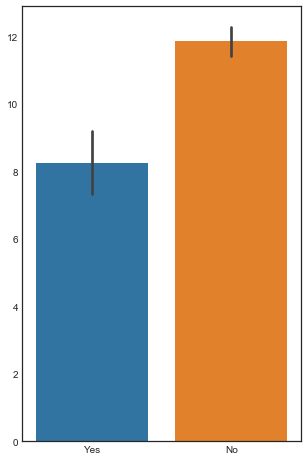

In [26]:
%matplotlib inline
barplot(df,'Attrition', 'TotalWorkingYears')

In [32]:
def strip_plot(df, x_col, y_col, jitter):
    f, ax = plt.subplots(figsize = (15,12))
    sns.stripplot(data=df, x=x_col, y=y_col, jitter=jitter)
    plt.show()

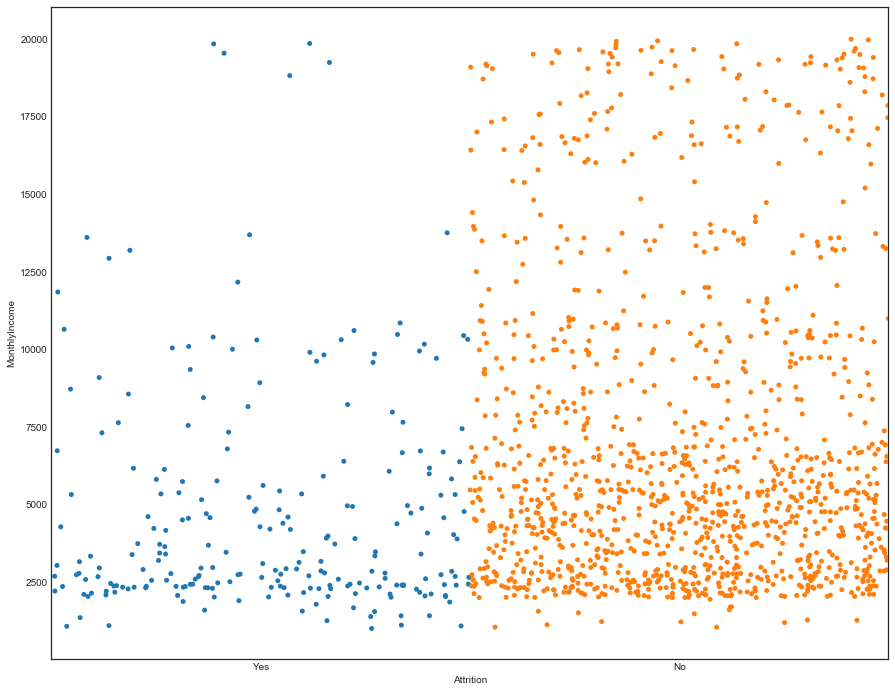

In [33]:
strip_plot(df,'Attrition','MonthlyIncome',0.5)

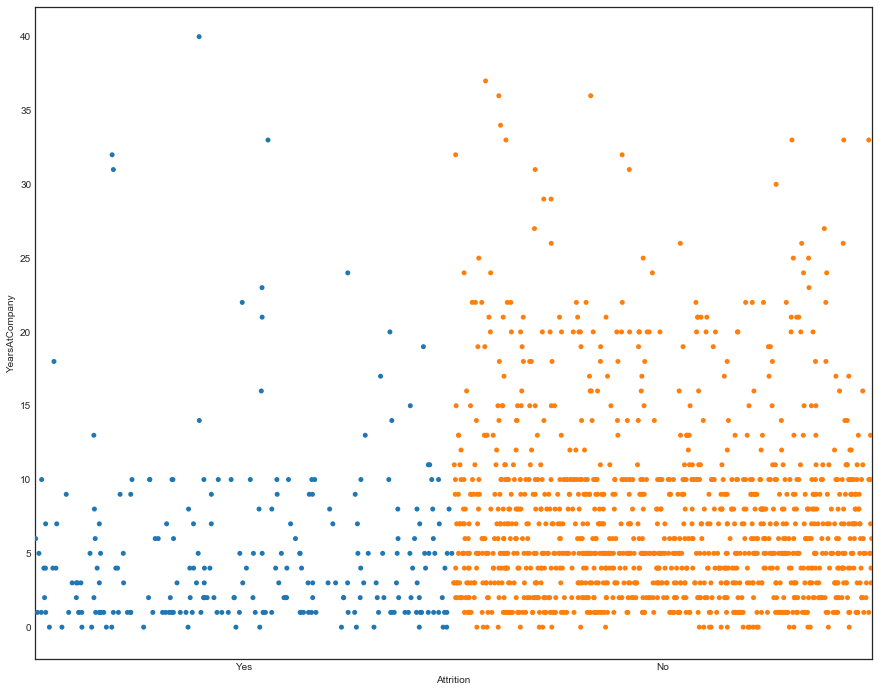

In [34]:
strip_plot(df,'Attrition','YearsAtCompany',0.5)

In [38]:
attr_yes_df = df[df['Attrition'] == 'Yes']
dept_counts = pd.DataFrame(attr_yes_df['Department'].value_counts().reset_index())

dept_counts.columns = ['dept', 'cnt']

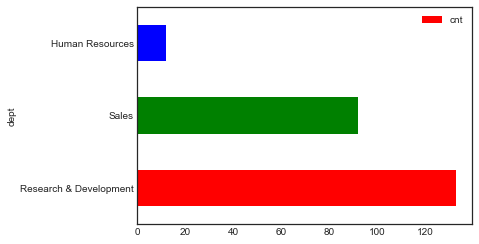

In [40]:
dept_counts.plot(x='dept', y='cnt', kind = 'barh', color=['r', 'g', 'b'])

## Class Imbalance

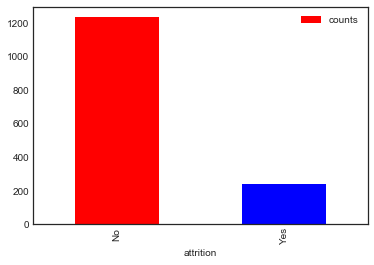

In [41]:
imb_df =df['Attrition'].value_counts().reset_index()
imb_df.columns = ['attrition', 'counts']


imb_df.plot(x='attrition', y='counts', color=['r', 'b'], kind='bar')           

## Correlation Matrix

In [42]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']

In [43]:
corr = df[numerical].corr()

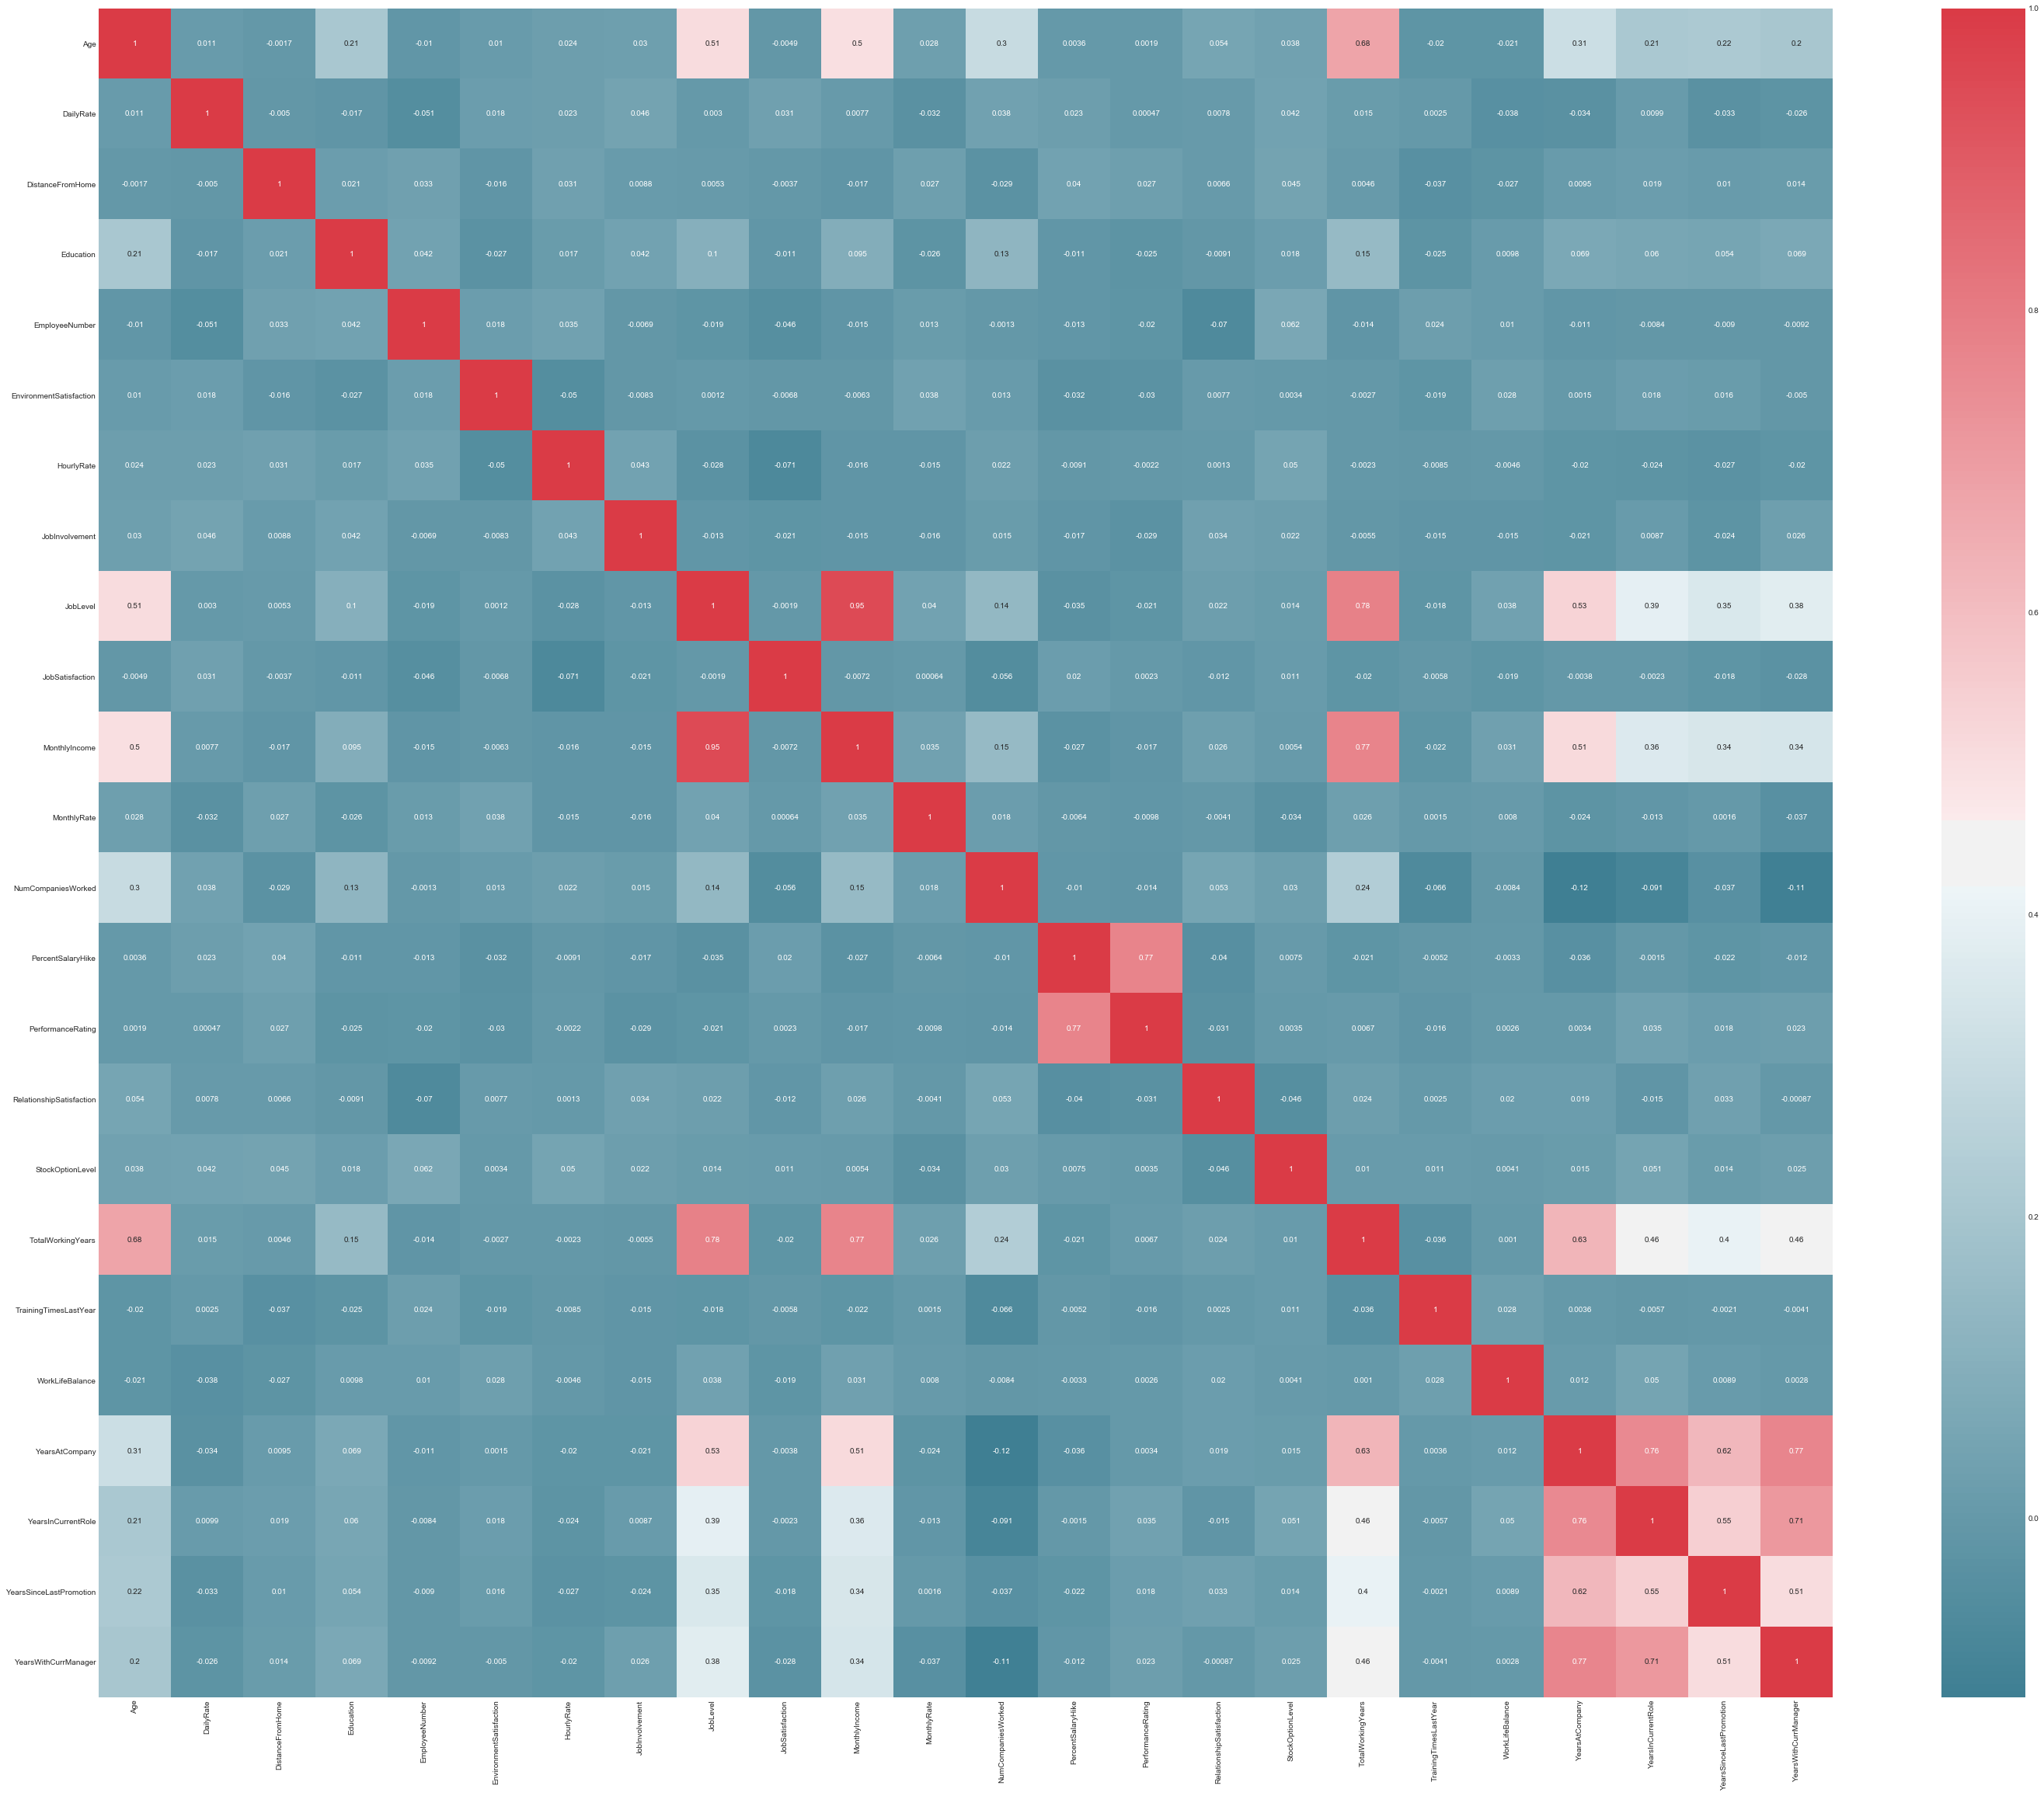

In [47]:
f, ax = plt.subplots(figsize=(50, 40))
sns_plot = sns.heatmap(corr, annot=True, cmap = sns.diverging_palette(220, 10, as_cmap=True))
fig = sns_plot.get_figure()
fig.savefig("corr.png")

In [49]:
target_map = {'Yes' :1, 'No' :0}

def map_attr(attr_input):
    return target_map[attr_input]

df["Attrition_numerical"] = df["Attrition"].apply(map_attr)

In [50]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


## Modelling

In [52]:
y = df['Attrition_numerical']
df.drop('Attrition_numerical', axis = 1, inplace = True)
df.drop('Attrition', axis = 1, inplace = True)
df.drop('JobLevel', axis = 1, inplace = True)
df.drop('PerformanceRating', axis = 1, inplace = True)

In [53]:
col_list = list(df.columns)

In [56]:
x = df[col_list]
x = pd.get_dummies(data=x, drop_first=True)

In [57]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,2,...,1,0,0,0,0,0,0,1,0,0


## Data Splitting

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=0)

In [61]:
oversampler=SMOTE(random_state=0)
x_smote, y_smote = oversampler.fit_sample(x_train, y_train)

## Random Forest Classifier

In [67]:
rf_params = {
    'n_estimators':100,
    'max_depth': 3,
    'min_samples_leaf':2,
    'max_features': 'sqrt'    
}

In [68]:
rf = RandomForestClassifier(**rf_params) # pass multiple items to dictionary

In [69]:
rf.fit(x_smote, y_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
y_pred = rf.predict(x_test)

In [71]:
accuracy_score(y_pred,y_test)

0.8231292517006803

In [73]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       367
           1       0.47      0.45      0.46        74

   micro avg       0.82      0.82      0.82       441
   macro avg       0.68      0.67      0.68       441
weighted avg       0.82      0.82      0.82       441



## Logistic Regression

In [74]:
lm = LogisticRegression()
lm.fit(x_smote, y_smote)

y_pred = lm.predict(x_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
accuracy_score(y_test,y_pred)

0.8662131519274376

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       371
           1       0.60      0.46      0.52        70

   micro avg       0.87      0.87      0.87       441
   macro avg       0.75      0.70      0.72       441
weighted avg       0.85      0.87      0.86       441



In [80]:
cols = list(x_train.columns)
importances = list(rf.feature_importances_)
imp_df = pd.DataFrame(list(zip(cols, importances)),columns=['features','imp'])


In [81]:
imp_df.sort_values('imp',ascending=False)

,features,imp
16,StockOptionLevel,0.106649
30,EducationField_Medical,0.092692
20,YearsAtCompany,0.081661
9,JobSatisfaction,0.078103
42,MaritalStatus_Married,0.059005
28,EducationField_Life Sciences,0.056314
10,MonthlyIncome,0.053940
0,Age,0.052411
17,TotalWorkingYears,0.051674
23,YearsWithCurrManager,0.044425
